In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn")
pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
filename = "/content/drive/MyDrive/Colab Notebooks/SQL/sales_data.csv"
df = pd.read_csv(filename, index_col=0)

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [5]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [7]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
City                 object
Sales               float64
dtype: object

In [8]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Month,Sales
count,"185,950.00","185,950.00","185,950.00","185,950.00","185,950.00"
mean,"230,417.57",1.12,184.40,7.06,185.49
std,"51,512.74",0.44,332.73,3.50,332.92
min,"141,234.00",1.00,2.99,1.00,2.99
25%,"185,831.25",1.00,11.95,4.00,11.95
50%,"230,367.50",1.00,14.95,7.00,14.95
75%,"275,035.75",1.00,150.00,10.00,150.00
max,"319,670.00",9.00,"1,700.00",12.00,"3,400.00"


In [9]:
df['City'].unique()

array(['Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)',
       'San Francisco  (CA)', 'Seattle  (WA)', 'Atlanta  (GA)',
       'New York City  (NY)', 'Portland  (OR)', 'Austin  (TX)',
       'Portland  (ME)'], dtype=object)

In [10]:
def sales_amount() -> None:
  """
  Essa função plota um gráfico com o total de vendas por cidade.
  """
  df.groupby(['City'])['Sales'].sum().sort_values(ascending=True).plot.barh(figsize=(18, 10))
  plt.title(f"Sales amount", fontsize=25)
  plt.ylabel('City', fontsize = 18)
  plt.xlabel('Sales ($)', fontsize = 18)
  plt.ticklabel_format(style='plain', axis='x');


def sales_month(month) -> None:
  """
  Essa função plota um gráfico com as vendas mensais de cada cidade
  do mês desejado (entrar com numero de 1 a 12).
  Ex: grafic_month(10) 
  Pra o mês  deoutubro.
  """
  df_month = df.loc[(df["Month"] == month)]

  df_month.groupby(['City'])['Sales'].sum().sort_values(ascending=True).plot.barh(figsize=(18, 10))
  plt.title(f"monthly sales by city - Month {month}", fontsize=25)
  plt.ylabel('City', fontsize = 18)
  plt.xlabel('Sales ($)', fontsize = 18)
  plt.ticklabel_format(style='plain', axis='x');


def sales_city(city: str = '') -> None:
  """
  Essa função filtra a cidade passada no argumento e
  plota um gráfico com as vendas de cada produto na cidade
   Ex: grafic_City('Dallas') 
  """
  filter_City = df.loc[df['City'].str.contains(city)]

  filter_City.groupby(['Product'])['Sales'].sum().sort_values(ascending=True).plot.barh(figsize=(18, 10))
  plt.title(f"{city} - total sales by product", fontsize=25)
  plt.ylabel('Product', fontsize = 18)
  plt.xlabel('Sales ($)', fontsize = 18)
  plt.ticklabel_format(style='plain', axis='x');


def sales_city_month(city: str, month: int) -> None:
  """
  Essa função filtra a cidade passada no argumento e
  plota um gráfico com as vendas de cada produto na cidade
   Ex: grafic_City('Dallas') 
  """
  filter_City = df.loc[df['City'].str.contains(city) & (df["Month"] == month)]

  filter_City.groupby(['Product'])['Sales'].sum().sort_values(ascending=True).plot.barh(figsize=(18, 10))
  plt.title(f"{city} - Month {month} - total sales by product", fontsize=25)
  plt.ylabel('Product', fontsize = 18)
  plt.xlabel('Sales ($)', fontsize = 18)
  plt.ticklabel_format(style='plain', axis='x');


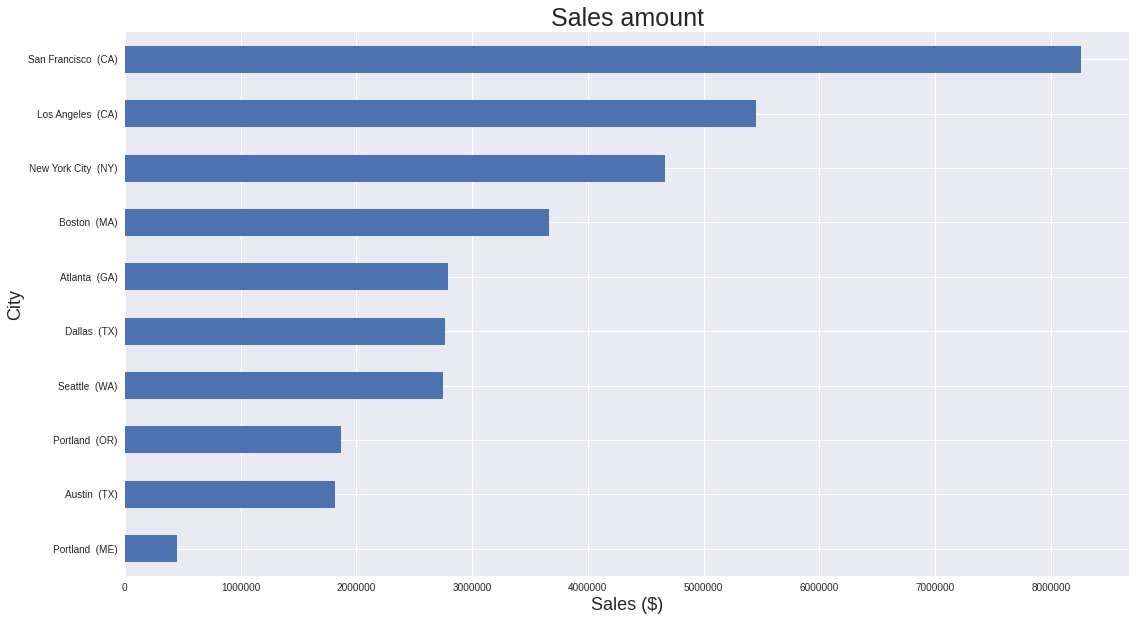

In [11]:
sales_amount()

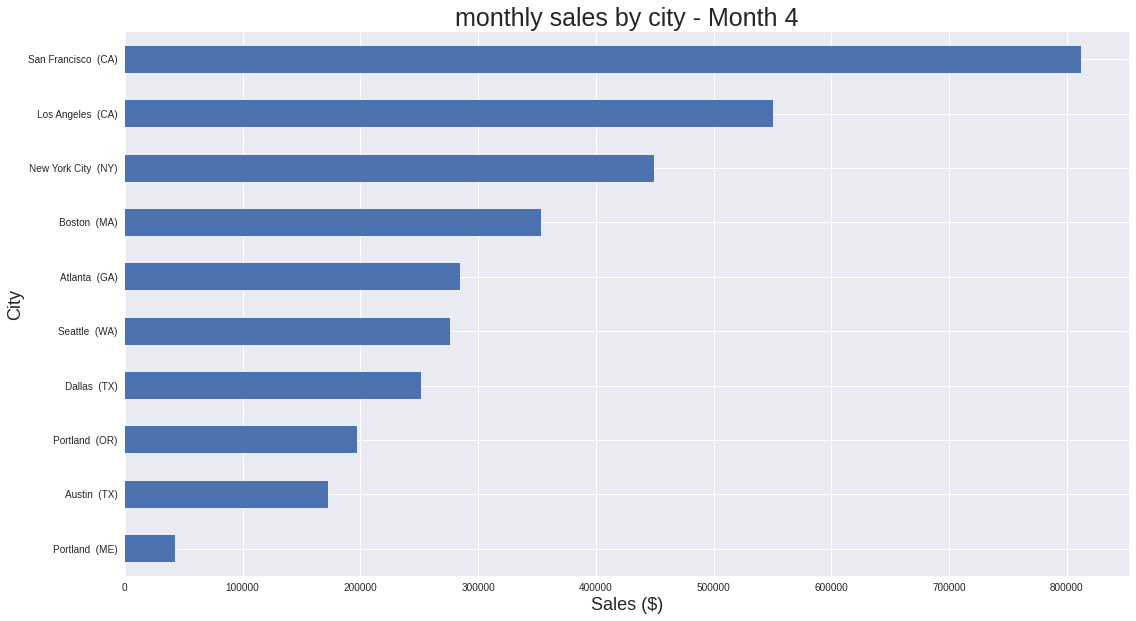

In [12]:
sales_month(4)

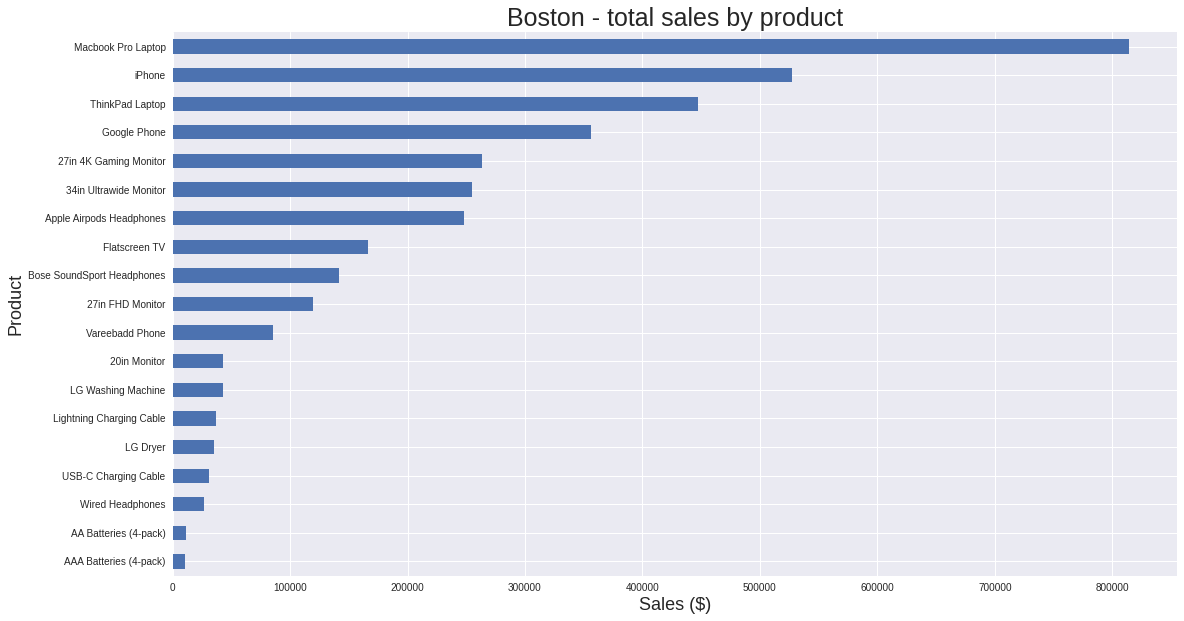

In [13]:
sales_city('Boston')

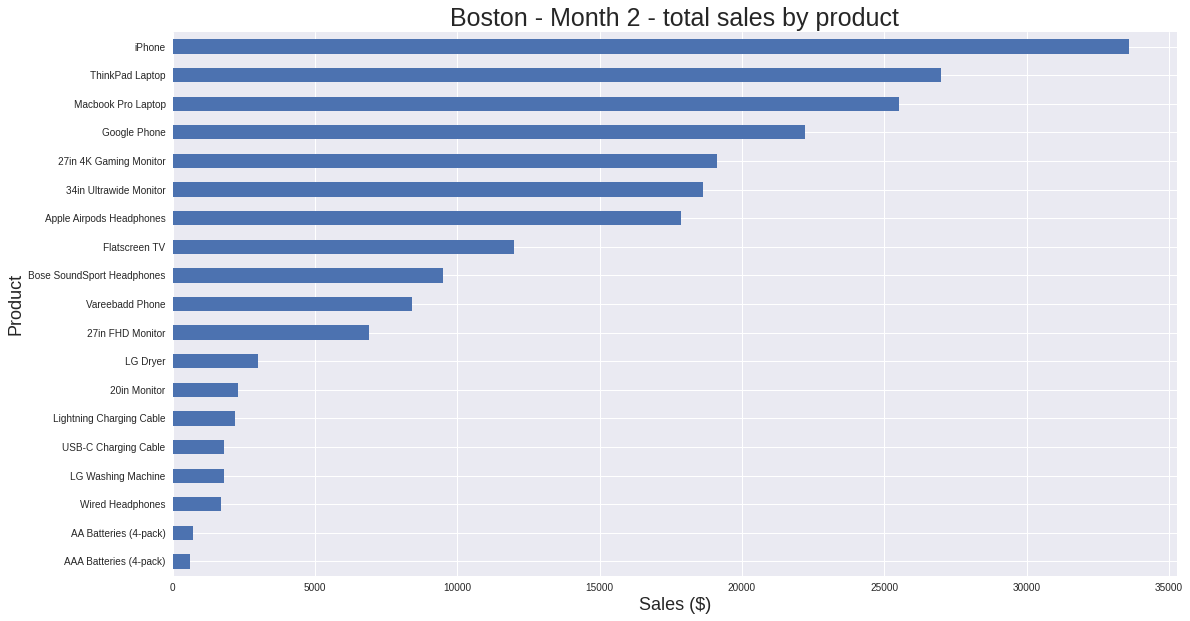

In [14]:
sales_city_month('Boston', 2)